In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import annotations
from typing import List
from dataclasses import dataclass

In [2]:
@dataclass
class Facility(object):
    def __init__(self, sf:float, capf: int, xf:float, yf:float) -> None:
        self.setup_cost = sf
        self.capacity = capf
        self.x = xf
        self.y = yf

@dataclass
class Customer(object):
    def __init__(self, dc:int, xc:float, yc:float) -> None:
        self.demand = dc
        self.x = xc
        self.y = yc

def read_input(input_f_path):
    N: int; M: int
    facilities: List[Facility]
    customers: List[Customer]
    with open(input_f_path, 'r+') as file_obj:
        file_obj = list(file_obj)

        N, M = file_obj[0].strip().split(' ')
        N, M = int(N), int(M)

        facilities = []
        for line in file_obj[1:N+1]:
            sf, capf, xf, yf = line.strip().split(' ')
            facilities.append( Facility(float(sf), int(capf), float(xf), float(yf)) )

        customers = []
        for line in file_obj[N+1:]:
            dc, xc, yc = line.strip().split(' ')
            customers.append( Customer(int(dc), float(xc), float(yc)) )
        return N, M, facilities, customers

In [3]:
def plot_facility(test_case):
    # Read data
    N, M, facilities, customers = read_input(f'data/{test_case}')
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    fig.suptitle(test_case, fontsize=24)

    # Plot statement
    total_cap = sum(fac.capacity for fac in facilities)
    for fac in facilities:
        axs[0].scatter(
            x=fac.x, y=fac.y,
            s=1000.0*fac.capacity/total_cap, c='b',
            marker='o')

    total_demand = sum(cus.demand for cus in customers)
    for cus in customers:
        axs[0].scatter(
            x=cus.x, y=cus.y,
            s=1000.0*cus.demand/total_demand, c='r',
            marker='x', label='customer')

    # Plot solution
    for fac in facilities:
        axs[1].scatter(
            x=fac.x, y=fac.y,
            s=1000.0*fac.capacity/total_cap, c='b',
            marker='o')

    total_demand = sum(cus.demand for cus in customers)
    for cus in customers:
        axs[1].scatter(
            x=cus.x, y=cus.y,
            s=1000.0*cus.demand/total_demand, c='r',
            marker='x')
    def plot_segment(p1, p2, color='b--', linewidth=0.5):
        axs[1].plot((p1[0], p2[0]), (p1[1], p2[1]), color, linewidth=linewidth)
    with open(f'submission/out_{test_case}', 'r+') as file_obj:
        file_obj = list(file_obj)

        total_cost = float(file_obj[0].strip().split(' ')[0])
        axs[1].set_title(f'Total cost = {total_cost:.3f}', fontsize=16)

        assignment = file_obj[1].strip().split(' ')
        for i in range(len(assignment)):
            fac_idx = int(assignment[i])
            plot_segment(
                (customers[i].x, customers[i].y),
                (facilities[fac_idx].x, facilities[fac_idx].y))

    plt.savefig(f'assets/{test_case}.png', dpi=300)
    plt.show()

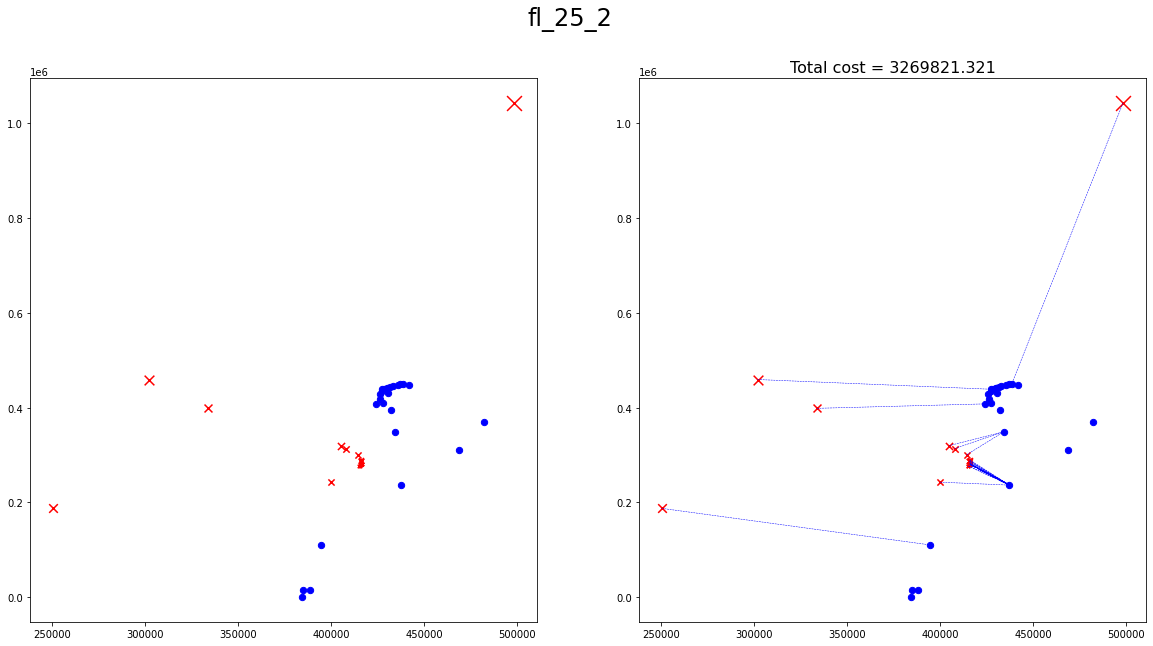

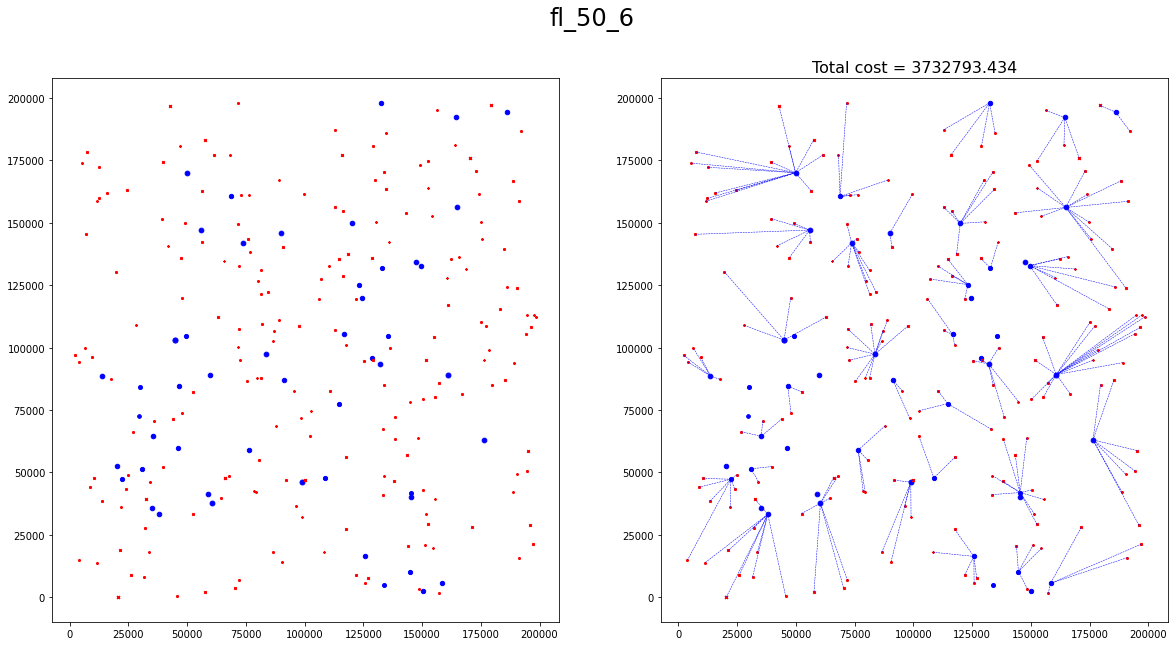

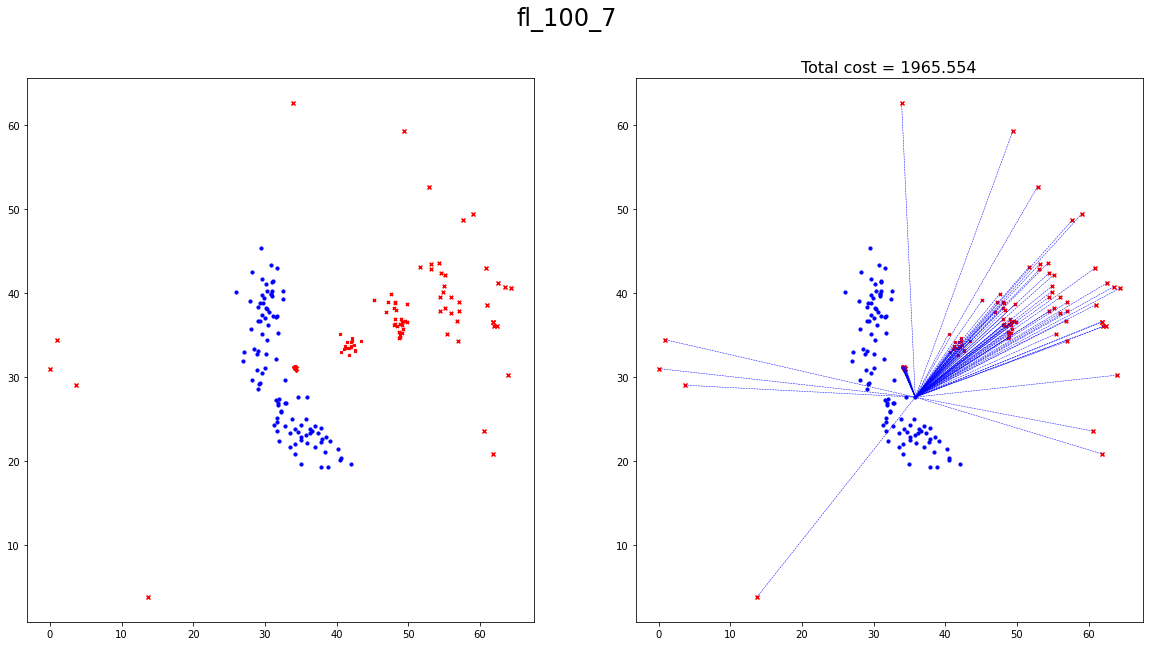

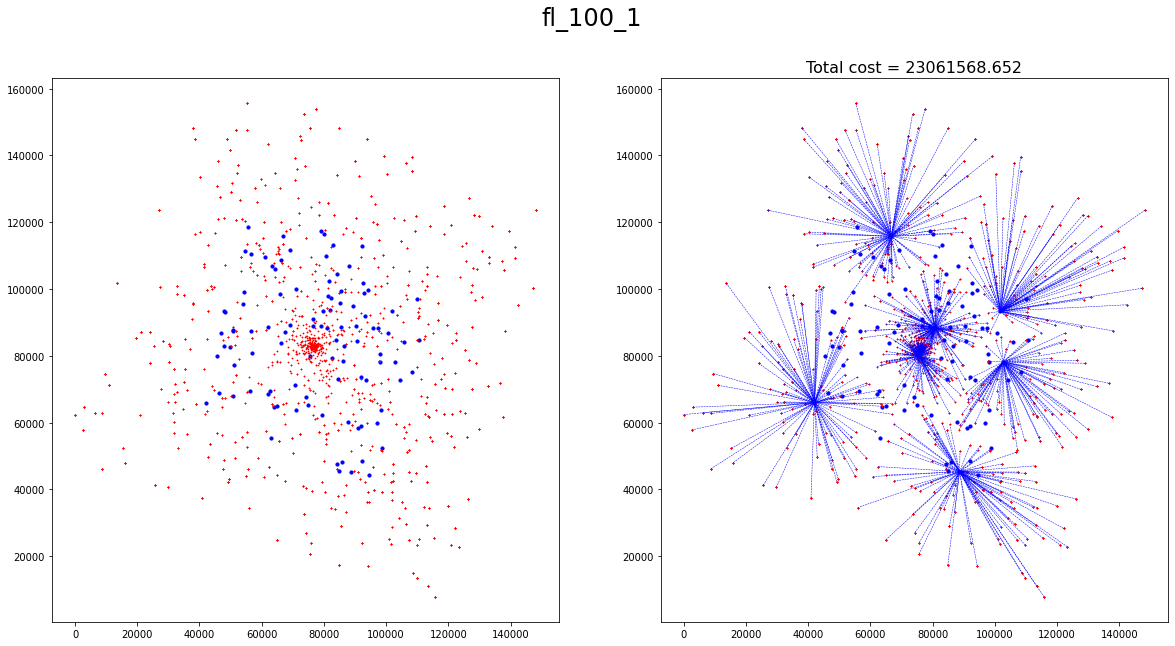

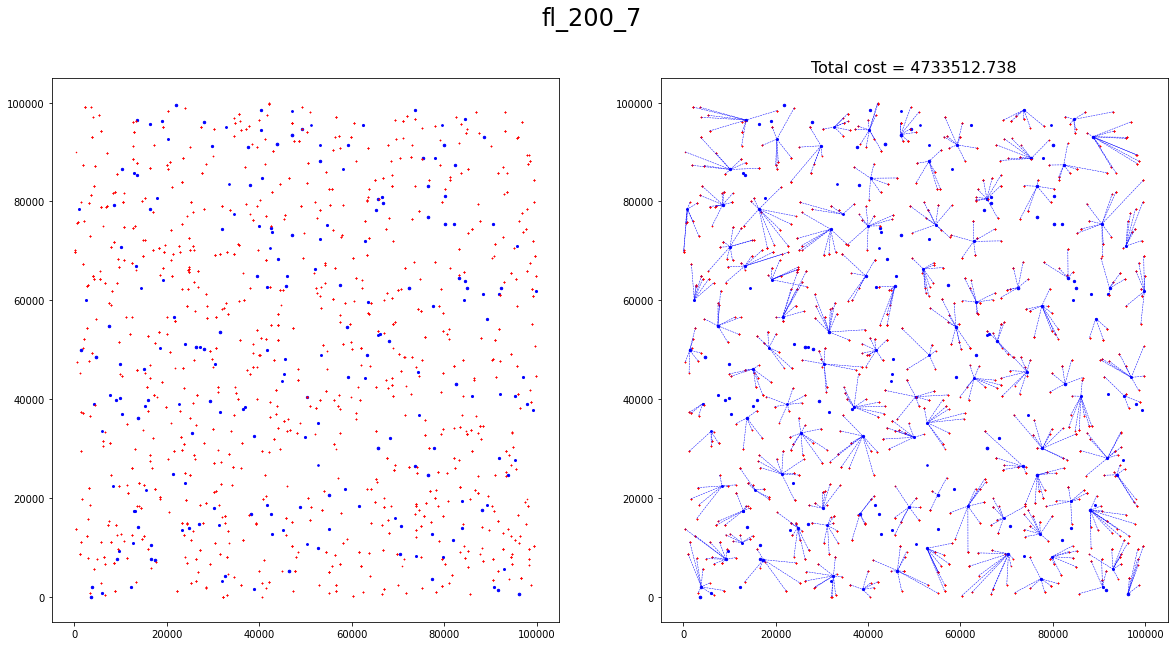

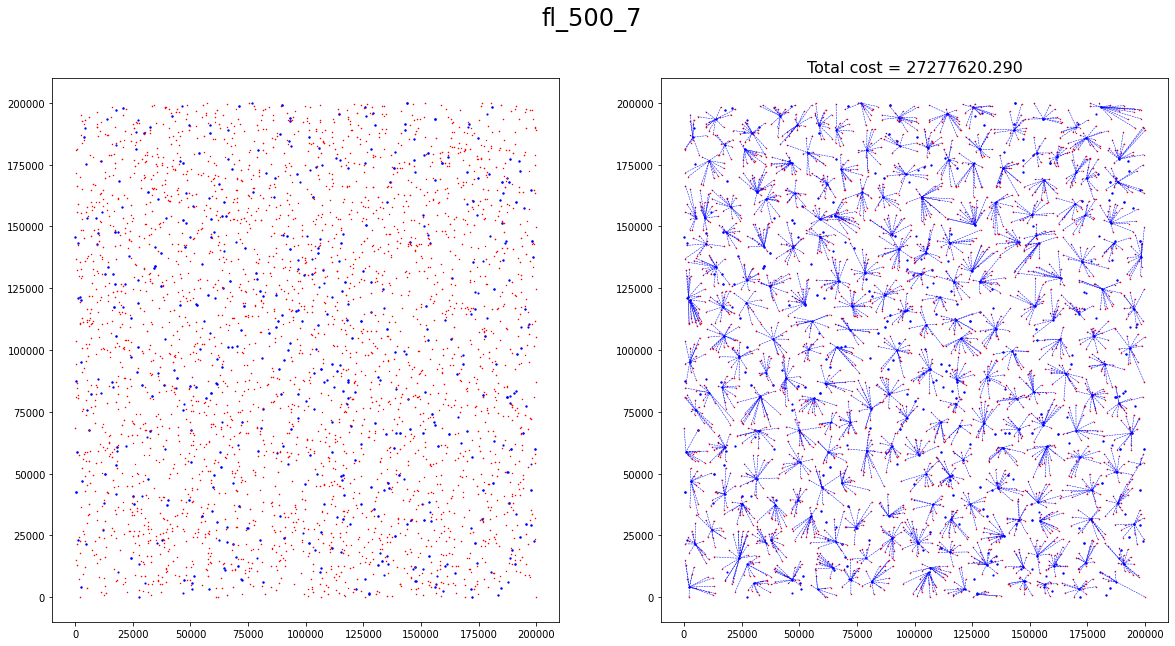

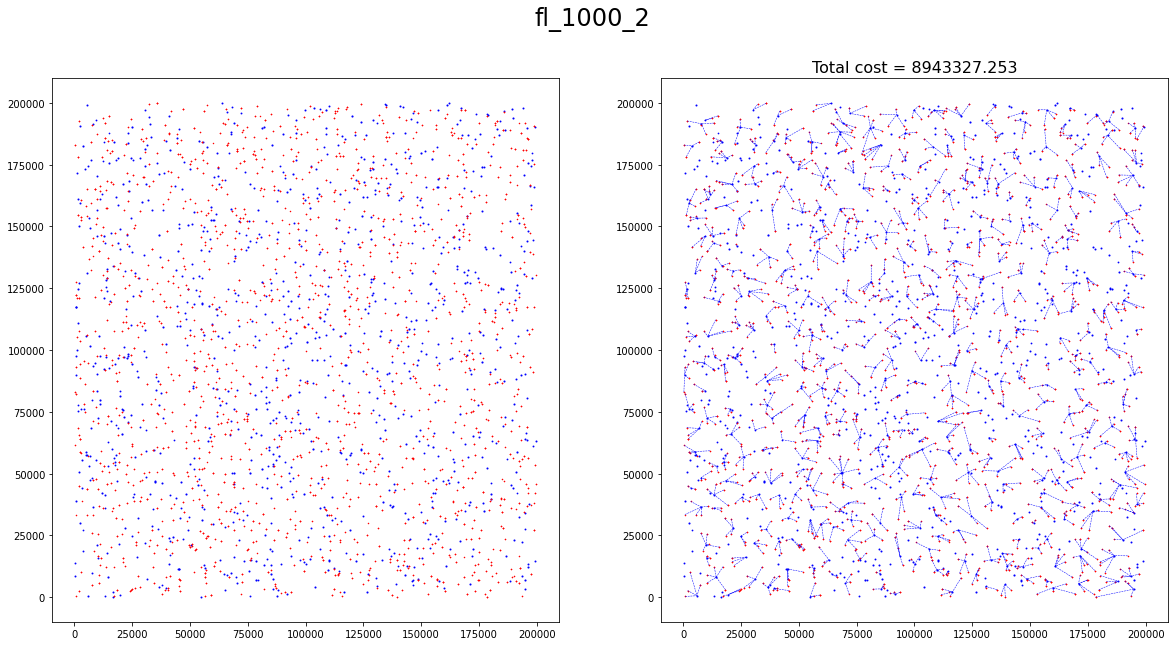

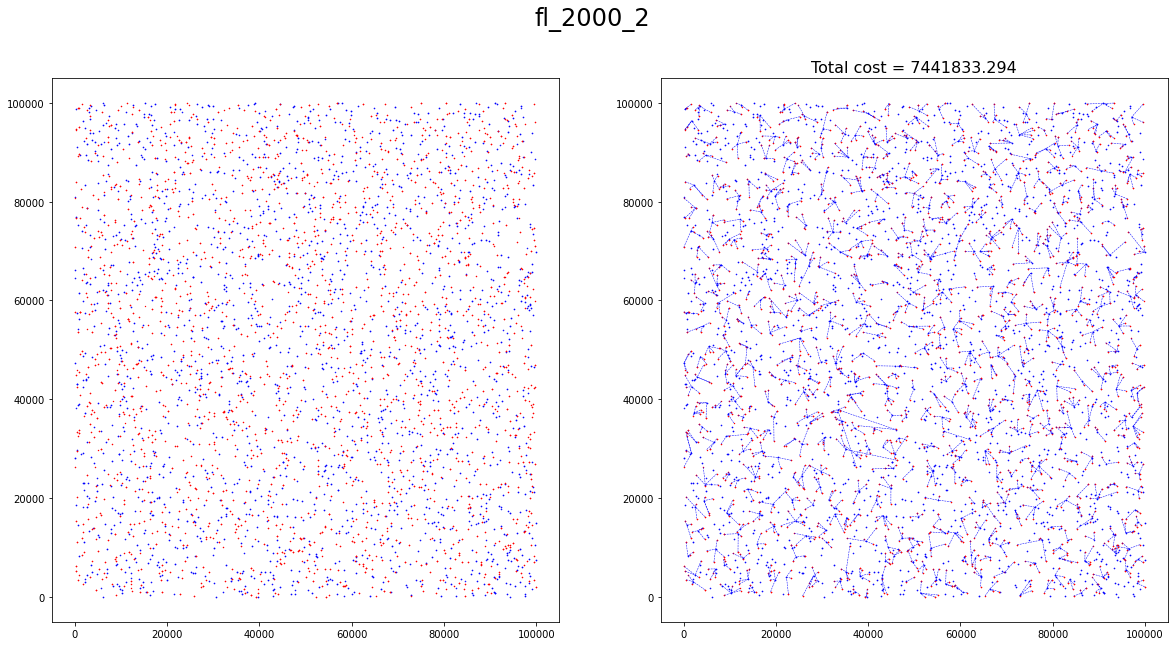

In [4]:
plot_facility('fl_25_2')
plot_facility('fl_50_6')
plot_facility('fl_100_7')
plot_facility('fl_100_1')
plot_facility('fl_200_7')
plot_facility('fl_500_7')
plot_facility('fl_1000_2')
plot_facility('fl_2000_2')